In [1]:
# import all the required libraries in this place


# from data.helper import *
# from data.data_visualization import *
import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing

import matplotlib.pyplot as plt

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
# from scikeras.wrappers import KerasClassifier


from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D,BatchNormalization

# import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.regularizers import l2

import sklearn.model_selection as model_selection
from sklearn.model_selection import StratifiedKFold

import joblib

import pydot
# from motif import load_dataset_from_jsonl, DATA_FILE_PATH
# from data.data_visualization import plot_confusion_matrix

2024-08-21 21:47:46.550220: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 21:47:46.561166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 21:47:46.574134: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 21:47:46.578094: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 21:47:46.587751: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import json

# Function to load dataset from JSONL files with error handling
def load_dataset_from_jsonl(file_path, testing=False):
    dataset = []
    
    # Use the file path directly, no need to append an index
    path = file_path + '.jsonl'
    
    try:
        with open(path, 'r') as file:
            for line_number, line in enumerate(file, 1):
                try:
                    data = json.loads(line)
                    dataset.append(data)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON on line {line_number} in file {path}: {e}")
                    continue  # Skip the problematic line and move on
        
        if not testing:
            print('File name:', path)
            print('Loading training data:', len(dataset), end='\n')
    
    except FileNotFoundError as e:
        print(f"File not found: {e}")
    
    return dataset

# File paths without trailing slashes
FILE_PATH = '/home/devnath/MOTIF_18_Aug/dataset/motif_dataset'

# Load training data
dataset_json = load_dataset_from_jsonl(FILE_PATH)



File name: /home/devnath/MOTIF_18_Aug/dataset/motif_dataset.jsonl
Loading training data: 3095


In [3]:
# reading json file what inside the file

import json

dataset = []
with open('/home/devnath/MOTIF_18_Aug/dataset/motif_dataset.jsonl') as user_file:
    for _ in range(10):  # Load a smaller subset of data
        line = user_file.readline()
        data = json.loads(line)
        dataset.append(data)

print(dataset[0:2])


[{'md5': '001d216ee755f0bc96125892e2fb3e3a', 'sha1': '51d7b351e70f2465832e7adad56429ad2a8a3e81', 'sha256': 'bd2097055380b96c62f39e1160d260122551fa50d1eccdc70390958af56ac003', 'reported_hash': 'bd2097055380b96c62f39e1160d260122551fa50d1eccdc70390958af56ac003', 'reported_family': 'shamoon', 'aliases': ['shamoon', 'disttrack'], 'label': 369, 'report_source': 'Symantec', 'report_date': '2/3/2020', 'report_url': 'https://symantec-enterprise-blogs.security.com/blogs/threat-intelligence/tensions-iran-destructive-attacks', 'report_ioc_url': None, 'appeared': '2018-12', 'histogram': [105341, 10097, 7058, 7149, 10001, 7330, 6064, 8579, 7269, 7104, 6545, 6019, 6465, 7014, 5836, 10397, 7494, 5408, 6057, 5843, 5645, 9142, 6180, 8034, 10159, 8367, 5893, 7575, 7340, 4975, 6893, 7178, 8771, 6428, 7509, 6475, 6052, 6381, 7183, 8718, 7050, 7062, 5206, 5670, 5507, 6066, 6239, 7513, 9061, 8357, 6858, 8039, 6634, 6801, 5478, 8197, 5692, 6916, 5496, 6151, 5986, 5376, 7012, 7044, 7120, 7921, 5983, 5874, 6808

In [4]:
print(dataset[1])

{'md5': '006b418307c534754f055436a91848aa', 'sha1': '1cc2b6b208b7687763659aeb5dcb76c5c2fbbf26', 'sha256': '6507caba5835cad645ae80a081b98284032e286d97dabb98bbfeb76c3d51a094', 'reported_hash': '1cc2b6b208b7687763659aeb5dcb76c5c2fbbf26', 'reported_family': 'downdelph', 'aliases': ['downdelph', 'delphacy', 'delphocy'], 'label': 115, 'report_source': 'ESET', 'report_date': '10/27/2016', 'report_url': 'https://www.welivesecurity.com/wp-content/uploads/2016/10/eset-sednit-full.pdf', 'report_ioc_url': None, 'appeared': '2016-10', 'histogram': [33164, 3265, 1112, 805, 860, 818, 313, 224, 991, 265, 203, 163, 330, 233, 96, 542, 397, 180, 123, 45, 157, 200, 38, 35, 198, 65, 47, 28, 60, 47, 50, 33, 708, 49, 41, 51, 705, 134, 67, 48, 691, 59, 79, 222, 93, 63, 103, 54, 763, 79, 147, 423, 87, 63, 32, 64, 400, 91, 58, 242, 94, 160, 49, 55, 2627, 2298, 236, 139, 747, 900, 104, 79, 7747, 360, 113, 77, 718, 877, 114, 74, 530, 64, 113, 423, 207, 477, 180, 145, 261, 63, 66, 215, 49, 235, 158, 132, 281, 305,

In [5]:
# print("Training dataset size: ", len(dataset_training))
# print("Type of dataset: ", type(dataset_training))
number_of_zero_labels = 0
number_of_one_labels = 0
number_of_negative_one_labels = 0
for data in dataset_json:
    if data['label'] == 0:
        number_of_zero_labels += 1
    elif data['label'] == 1:
        number_of_one_labels += 1
    else:
        number_of_negative_one_labels += 1
print("Number of zero labels: ", number_of_zero_labels)
print("Number of one labels: ", number_of_one_labels)
print("Number of negative one labels: ", number_of_negative_one_labels)

# print("Testing dataset size: ", len(dataset_testing))

# # print % of zero labels
# print("Percentage of zero labels: ", number_of_zero_labels/len(dataset_training)*100)
# print("Percentage of one labels: ", number_of_one_labels/len(dataset_training)*100)
# print("Percentage of negative one labels: ", number_of_negative_one_labels/len(dataset_training)*100)

Number of zero labels:  15
Number of one labels:  2
Number of negative one labels:  3078


In [6]:
motif_family = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_families.csv')

In [7]:
motif_report = pd.read_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_reports.csv',encoding='ISO-8859-1')

In [8]:
motif_family.head()

,Aliases,Description,Attribution (If any)
0,acidbox,Targeted malware that exploits VirtualBox,NaN
1,artradownloader/artra/bitterartra/bitartra,Downloader of bitterrat,bitter
2,egregor/egregorransom,"Ransomware, variant of sekhmet and maze",NaN
3,redaman,Banking trojan,NaN
4,ryuk/ryukran/ruyk,Ransomware that targets enterprise environments,wizardspider


In [9]:
motif_report.head()

,File hash,Reported family,Source,Report date,Report URL,IOC URL (If any)
0,eb30a1822bd6f503f8151cb04bfd315a62fa67dbfe1f57...,acidbox,Palo Alto Networks,6/17/2020,https://unit42.paloaltonetworks.com/acidbox-ra...,NaN
1,3ef071e0327e7014dd374d96bed023e6c434df6f98cce8...,acidbox,Palo Alto Networks,6/17/2020,https://unit42.paloaltonetworks.com/acidbox-ra...,NaN
2,003669761229d3e1db0f5a5b333ef62b3dffcc8e27c821...,acidbox,Palo Alto Networks,6/17/2020,https://unit42.paloaltonetworks.com/acidbox-ra...,NaN
3,b3166c417d49e94f3d9eab9b1e8ab853b58ba59f734f77...,acidbox,Palo Alto Networks,6/17/2020,https://unit42.paloaltonetworks.com/acidbox-ra...,NaN
4,3ad20ca49a979e5ea4a5e154962e7caff17e4ca4f00bec...,acidbox,Palo Alto Networks,6/17/2020,https://unit42.paloaltonetworks.com/acidbox-ra...,NaN


In [10]:
motif_family['Aliases'].nunique()

455

In [11]:
motif_family.shape

(455, 3)

motif_report.shape

In [12]:
motif_report.shape

(4369, 6)

In [13]:
motif_report['Reported family'].nunique()

596

In [14]:
motif_report['File hash'].nunique()

4281

In [15]:
# Load the CSV file
FAMILY_FILE_PATH = "/home/devnath/MOTIF_18_Aug/dataset/motif_families.csv"
df_family = pd.read_csv(FAMILY_FILE_PATH)

# Define major families with their keywords
major_families = {
    'Downloader': ['downloader', 'fetcher', 'retriever'],
    'Ransomware': ['ransomware', 'cryptolocker', 'cryptowall', 'ransom'],
    'Trojan': ['trojan', 'banking', 'infostealer'],
    'Backdoor': ['backdoor', 'remote access'],
    'Infostealer': ['stealer', 'spy', 'keylogger'],
    'Loader': ['loader', 'dropper'],
    'Botnet': ['botnet', 'zombie', 'network'],
    'ATM Malware': ['atm', 'banking', 'card'],
    'Dropper': ['dropper'],
    'Miscellaneous': []  # For categories that don't fit in the above
}

# Function to classify families
def classify_family(description, major_families):
    description_lower = description.lower()
    for major, keywords in major_families.items():
        if any(keyword in description_lower for keyword in keywords):
            return major
    return 'Miscellaneous'

# Apply classification based on 'Description' column
df_family['Major_Family'] = df_family['Description'].apply(lambda x: classify_family(str(x), major_families))

# Force inclusion of 'Dropper' if not classified correctly
dropper_keywords = major_families['Dropper']
dropper_cases = df_family['Description'].apply(lambda x: any(keyword in str(x).lower() for keyword in dropper_keywords))

df_family.loc[dropper_cases, 'Major_Family'] = 'Dropper'

df_family.head()

,Aliases,Description,Attribution (If any),Major_Family
0,acidbox,Targeted malware that exploits VirtualBox,NaN,Miscellaneous
1,artradownloader/artra/bitterartra/bitartra,Downloader of bitterrat,bitter,Downloader
2,egregor/egregorransom,"Ransomware, variant of sekhmet and maze",NaN,Ransomware
3,redaman,Banking trojan,NaN,Trojan
4,ryuk/ryukran/ruyk,Ransomware that targets enterprise environments,wizardspider,Ransomware


In [16]:
# Check the distribution of the major families
print(df_family['Major_Family'].value_counts())

Major_Family
Miscellaneous    137
Ransomware       103
Trojan            68
Backdoor          65
ATM Malware       24
Downloader        16
Botnet            14
Infostealer       14
Loader             9
Dropper            5
Name: count, dtype: int64


In [17]:
# Remove specified columns
df_family = df_family.drop(columns=['Description', 'Attribution (If any)'])

In [18]:
df_family.head()

,Aliases,Major_Family
0,acidbox,Miscellaneous
1,artradownloader/artra/bitterartra/bitartra,Downloader
2,egregor/egregorransom,Ransomware
3,redaman,Trojan
4,ryuk/ryukran/ruyk,Ransomware


In [19]:
# Check the distribution of the major families
print(df_family['Major_Family'].value_counts())

Major_Family
Miscellaneous    137
Ransomware       103
Trojan            68
Backdoor          65
ATM Malware       24
Downloader        16
Botnet            14
Infostealer       14
Loader             9
Dropper            5
Name: count, dtype: int64


In [20]:
print(f"Total number of instances: {df_family.shape[0]}")

Total number of instances: 455


In [21]:
df_family['Major_Family'].unique()

array(['Miscellaneous', 'Downloader', 'Ransomware', 'Trojan', 'Backdoor',
       'Botnet', 'Infostealer', 'Loader', 'ATM Malware', 'Dropper'],
      dtype=object)

In [22]:
classes = df_family['Major_Family'].unique()
class_encoder = LabelEncoder()
encodings = class_encoder.fit_transform(classes)

In [23]:
class_encoder.classes_, encodings

(array(['ATM Malware', 'Backdoor', 'Botnet', 'Downloader', 'Dropper',
        'Infostealer', 'Loader', 'Miscellaneous', 'Ransomware', 'Trojan'],
       dtype=object),
 array([7, 3, 8, 9, 1, 2, 5, 6, 0, 4]))

In [24]:
# Create a dictionary to map aliases to Class names from the df_family
class_dict = {}

for index, row in df_family.iterrows():
    for alias in row['Aliases'].split('/'):
        #assing the encoding
        class_dict[alias] = class_encoder.transform([row['Major_Family']])[0]

In [25]:
df_family['Aliases'].apply(lambda x: (x.split('/')))

0                                            [acidbox]
1      [artradownloader, artra, bitterartra, bitartra]
2                             [egregor, egregorransom]
3                                            [redaman]
4                                [ryuk, ryukran, ruyk]
                            ...                       
450                                  [ozone, ozonerat]
451                                          [crypt38]
452                               [herbst, crypherbst]
453                                  [avatar, ratavar]
454                                        [pinchduke]
Name: Aliases, Length: 455, dtype: object

In [26]:
def extract_features(feature, feature_name, features):
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '_' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

def extract_features_from_dataset_to_dataframe(dataset):
    
    features= {}
    features['family']=[]

    section_names = ['.text', '.data', '.rsrc']
    feature_names = ['size', 'entropy', 'vsize']

    for section in section_names:
        for feature in feature_names:
            features[section +'_' + feature] = []

    features['machine']=[]
    features['subsystem']=[]


    for data in dataset:

        #all sections should be equal to 1    
        section_count_list = {'.text':0, '.data':0, '.rsrc':0}
        for item in data['section']['sections']:
            
            if item['name'] in section_names:
                section_count_list[item['name']]+=1
        
        check = False
        for key,value in section_count_list.items():
            if value!=1:
                check=True
                break
        
        if check:
            continue
            
        feature_names = ['size', 'entropy', 'vsize']
            
        for item in data['section']['sections']:

            if item['name'] in section_names:
                
                for feature in feature_names:
                    val = item[feature] if item[feature]!=None else None
                    features[item['name'] + '_' + feature].append(val)
        
        feature_names = ['general', 'strings']

        for feature in feature_names:
            extract_features(data[feature], feature,features)

        for item in data['header']:
            extract_features(data['header'][item], item,features)
        
        features['machine'].append(data['header']['coff']['machine'])
        features['subsystem'].append(data['header']['optional']['subsystem'])
        features['family'].append(class_dict[data['reported_family']])

    df = pd.DataFrame(features)
    print(df['family'].value_counts())
    return df

In [27]:
def load_dataset_from_jsonl(file_path):
    dataset = []
    with open(file_path, 'r') as file:
      for line in file:
          data = json.loads(line)
          dataset.append(data)
    return dataset

DATA_FILE_PATH = '/home/devnath/MOTIF_18_Aug/dataset/motif_dataset.jsonl'

In [28]:
dataset = load_dataset_from_jsonl(DATA_FILE_PATH)
flattened_df = extract_features_from_dataset_to_dataframe(dataset)

family
7    481
9    401
8    328
1    258
3    237
2    108
0     64
5     41
6     38
4     35
Name: count, dtype: int64


In [29]:
flattened_df.shape

(1991, 48)

In [30]:
flattened_df.head()

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
0,7,126976,6.575984,126976,53248,1.072074,53248,1695744,7.972631,1695744,...,0,10,0,5,1,5,1,124416,1024,4096
1,3,92160,5.577740,91872,9216,3.491902,9160,512,3.630718,512,...,2,8,0,5,2,5,2,92160,1024,8192
2,9,161280,6.629267,160883,4096,3.140377,7208,1536,4.102352,1512,...,0,14,10,6,0,6,0,161280,1024,4096
3,7,118784,6.403856,118362,36864,1.233187,50084,634880,7.954867,634796,...,0,10,0,5,2,5,2,118784,1024,4096
4,9,270336,6.737688,267065,12288,3.726259,26492,638976,7.662170,638048,...,0,8,0,4,0,4,0,270336,4096,4096


In [31]:
print(flattened_df['machine'].unique())

['I386' 'AMD64']


In [32]:
print(flattened_df['subsystem'].unique())

['WINDOWS_CUI' 'WINDOWS_GUI' 'NATIVE']


In [33]:
len(flattened_df)

1991

In [34]:
flattened_df['subsystem'].replace('???','UNKNOWN',inplace=True)

/tmp/ipykernel_61236/611000922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flattened_df['subsystem'].replace('???','UNKNOWN',inplace=True)


In [35]:
flattened_df['machine'].replace('???','UNKNOWN',inplace=True)

/tmp/ipykernel_61236/44312338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flattened_df['machine'].replace('???','UNKNOWN',inplace=True)


In [36]:
flattened_df.dropna(how='all', axis=1, inplace=True)

In [37]:
flattened_df.head(5)

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
0,7,126976,6.575984,126976,53248,1.072074,53248,1695744,7.972631,1695744,...,0,10,0,5,1,5,1,124416,1024,4096
1,3,92160,5.577740,91872,9216,3.491902,9160,512,3.630718,512,...,2,8,0,5,2,5,2,92160,1024,8192
2,9,161280,6.629267,160883,4096,3.140377,7208,1536,4.102352,1512,...,0,14,10,6,0,6,0,161280,1024,4096
3,7,118784,6.403856,118362,36864,1.233187,50084,634880,7.954867,634796,...,0,10,0,5,2,5,2,118784,1024,4096
4,9,270336,6.737688,267065,12288,3.726259,26492,638976,7.662170,638048,...,0,8,0,4,0,4,0,270336,4096,4096


In [38]:
def label_encoding(df_training,columns):
  column_data = {}
  for column in columns:
    column_data[column] = tuple(set(df_training[column].unique()))
  
  le  = LabelEncoder()
  for column in columns:
    le.fit(column_data[column])
    df_training[column] = le.transform(df_training[column])
    
  
  return df_training

In [39]:
columns_to_encode = ['machine', 'subsystem']
df_trainng = label_encoding(flattened_df,columns_to_encode)

In [40]:
flattened_df.head(5)

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
0,7,126976,6.575984,126976,53248,1.072074,53248,1695744,7.972631,1695744,...,0,10,0,5,1,5,1,124416,1024,4096
1,3,92160,5.577740,91872,9216,3.491902,9160,512,3.630718,512,...,2,8,0,5,2,5,2,92160,1024,8192
2,9,161280,6.629267,160883,4096,3.140377,7208,1536,4.102352,1512,...,0,14,10,6,0,6,0,161280,1024,4096
3,7,118784,6.403856,118362,36864,1.233187,50084,634880,7.954867,634796,...,0,10,0,5,2,5,2,118784,1024,4096
4,9,270336,6.737688,267065,12288,3.726259,26492,638976,7.662170,638048,...,0,8,0,4,0,4,0,270336,4096,4096


In [41]:
# Check the result
print(flattened_df['machine'].unique())

[1 0]


In [42]:
len(flattened_df)

1991

In [43]:
def data_pruning(df_training,exclude_columns,threshold):
  for column in df_training.columns:

    if df_training[column].max()>10*df_training[column].median() and df_training[column].max()>10 and all([ not column.startswith(x) for x in exclude_columns]) :
        df_training[column] = np.where(df_training[column]<df_training[column].quantile(threshold), df_training[column], df_training[column].quantile(threshold))
  
  return df_training

In [44]:
exclude_columns= [
"machine", "subsystem", "label"
]
threshold = 0.98
flattened_df = data_pruning(flattened_df,exclude_columns,threshold)

In [45]:
def log_modification(df_training):
  for column in df_training.columns:
    if df_training[column].nunique()>50 and df_training[column].max() > 10*df_training[column].median():
      print(column)
      df_training[column] = np.log(df_training[column]+1)
      # df_testing[column] = np.log(df_testing[column]+1)  
  
  return df_training

In [46]:
flattened_df  = log_modification(flattened_df)

.text_size
.text_vsize
.data_size
.data_vsize
.rsrc_size
.rsrc_vsize
general_size
general_vsize
strings_numstrings
strings_avlength
strings_printables
strings_MZ
optional_sizeof_code


In [47]:
def standardize_train_test(df_training,exclude_coulumns):
  df_training_standardized = standardize(df_training,df_training)
  
  return df_training_standardized

In [48]:
def standardize(df,df_train_fit):
    scaler = StandardScaler()
    exclude_columns= [
    "machine", "subsystem", "family"
    ]

    df_standardized = df.copy()

    for column in df.columns:
        if all([ not column.startswith(x) for x in exclude_columns]):
            # Standardize the column
            scaler = scaler.fit(df_train_fit[column].values.reshape(-1, 1))
            df_standardized[column] = scaler.transform(df[column].values.reshape(-1, 1))

    return df_standardized

In [49]:
# Unpack all three returned values correctly
flattened_df_standardized  = standardize_train_test(flattened_df,  exclude_columns)

In [50]:
flattened_df_standardized.describe()

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
count,1991.000000,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,...,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03,1.991000e+03
mean,5.704671,6.379182e-16,-3.194052e-16,8.457992e-16,-1.498885e-16,1.427509e-17,-4.282528e-16,-9.564312e-16,-3.497398e-16,-7.387360e-16,...,-3.925650e-17,2.426766e-16,-1.605948e-17,-6.459479e-16,1.427509e-17,5.353160e-16,-2.141264e-17,-1.109888e-15,5.710037e-17,2.219777e-15
std,3.009562,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,...,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,0.000000,-6.204392e+00,-5.791883e+00,-4.327986e+00,-4.386570e+00,-1.714896e+00,-4.174980e+00,-1.217288e+00,-2.919430e+00,-3.328702e+00,...,-1.431863e-01,-2.855670e+00,-4.368761e-01,-5.792321e+00,-6.805269e-01,-5.978720e+00,-7.237258e-01,-3.095498e+00,-9.054707e-01,-1.787982e+01
25%,3.000000,-3.194728e-01,5.881058e-02,-5.747136e-01,-3.514930e-01,-7.222109e-01,-5.861468e-01,-9.451793e-01,-5.470125e-01,-8.728487e-01,...,-1.431863e-01,-4.532451e-01,-4.368761e-01,-1.318888e+00,-6.805269e-01,-1.363120e+00,-7.237258e-01,-5.699076e-01,-4.707487e-01,-2.662280e-02
50%,7.000000,1.176819e-01,2.650781e-01,5.021403e-02,-1.160181e-01,-1.254639e-01,-7.405636e-02,-2.411169e-01,-1.200240e-01,-1.831426e-01,...,-1.431863e-01,1.473612e-01,-4.368761e-01,1.722568e-01,-6.805269e-01,1.754129e-01,-7.237258e-01,5.052005e-02,-4.707487e-01,-2.662280e-02
75%,8.000000,4.775982e-01,3.353717e-01,5.928296e-01,5.275951e-01,7.280293e-01,5.697518e-01,8.363110e-01,6.088222e-01,8.419578e-01,...,-1.431863e-01,7.479676e-01,-4.368761e-01,1.722568e-01,8.521983e-01,1.754129e-01,8.597227e-01,5.755368e-01,-4.707487e-01,-2.662280e-02
max,9.000000,1.515380e+00,1.561760e+00,2.100532e+00,1.934625e+00,1.978353e+00,2.692791e+00,2.133259e+00,1.673669e+00,2.045516e+00,...,6.983910e+00,1.348574e+00,3.222719e+00,7.627979e+00,1.464673e+01,1.713946e+00,2.443171e+00,2.113332e+00,2.137583e+00,2.359311e+01


In [51]:
flattened_df_standardized['family'].value_counts()

family
7    481
9    401
8    328
1    258
3    237
2    108
0     64
5     41
6     38
4     35
Name: count, dtype: int64

In [52]:
flattened_df_standardized.head()

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
0,7,0.216416,0.254647,0.154789,0.892658,-1.219921,0.204888,1.968329,1.657989,1.880121,...,-0.143186,0.147361,-0.436876,0.172257,0.852198,0.175413,0.859723,0.147196,-0.470749,-0.026623
1,3,0.041321,-0.663225,-0.110068,0.041824,-0.102690,-0.682644,-1.217288,-0.834884,-1.062575,...,6.983910,-0.453245,-0.436876,0.172257,2.384923,0.175413,2.443171,-0.089792,-0.470749,23.593105
2,9,0.347076,0.303640,0.348503,-0.351493,-0.264988,-0.803480,-0.785909,-0.564099,-0.669807,...,-0.143186,1.348574,0.774910,1.663401,-0.680527,1.713946,-0.723726,0.352128,-0.470749,-0.026623
3,7,0.179978,0.096378,0.097292,0.714278,-1.145535,0.173998,1.582109,1.647790,1.523304,...,-0.143186,0.147361,-0.436876,0.172257,2.384923,0.175413,2.443171,0.110614,-0.470749,-0.026623
4,9,0.629287,0.403331,0.763315,0.181366,0.005512,-0.147144,1.584637,1.479741,1.525160,...,-0.143186,-0.453245,-0.436876,-1.318888,-0.680527,-1.363120,-0.723726,0.760019,2.137583,-0.026623


/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


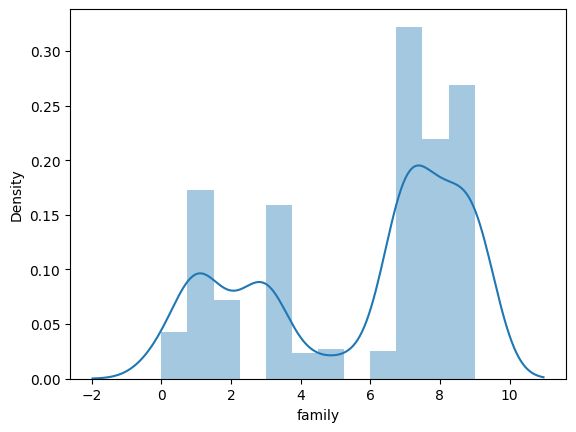

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


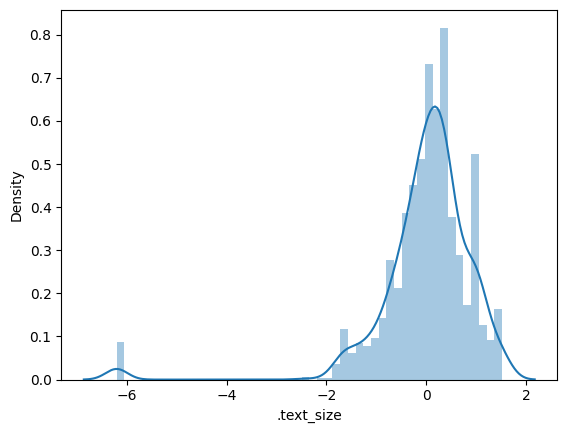

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


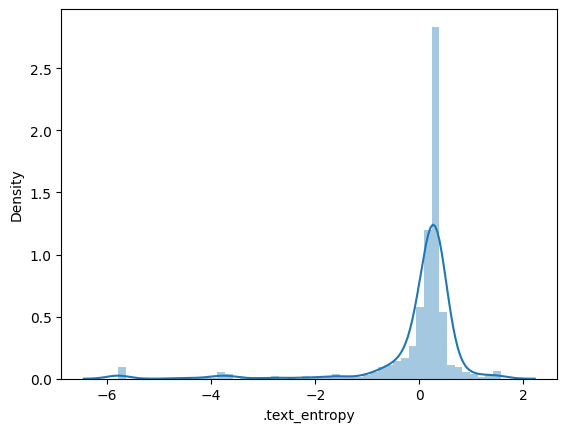

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


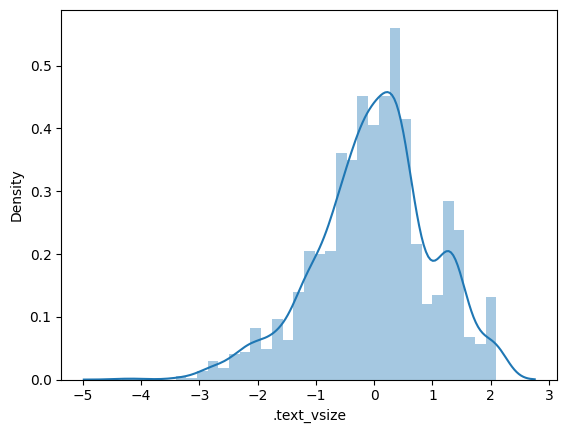

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


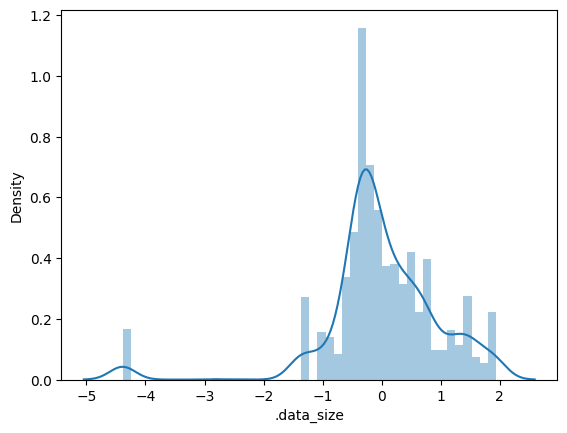

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


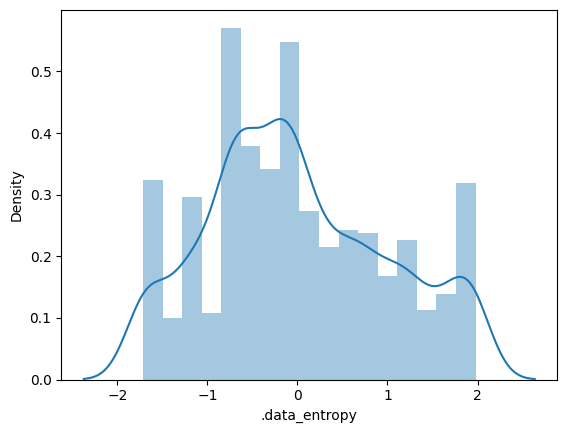

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


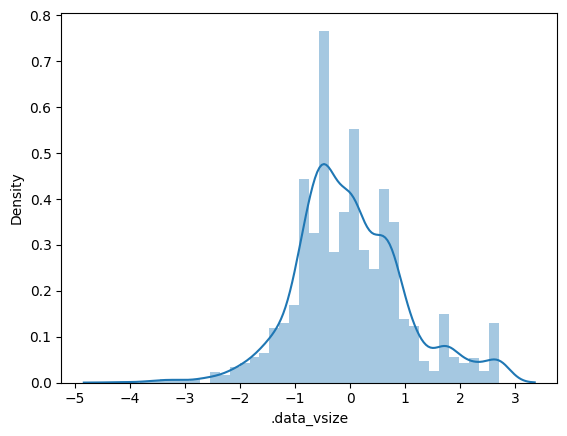

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


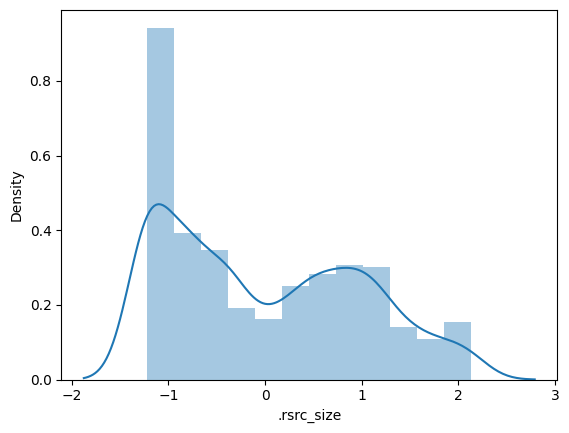

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


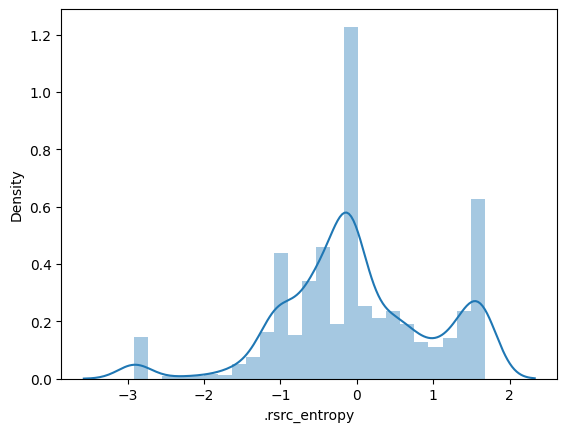

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


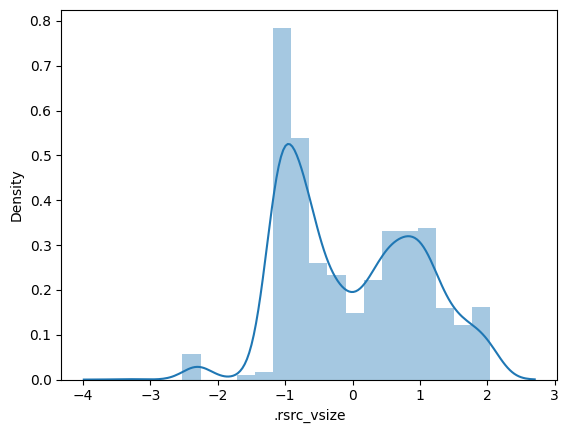

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


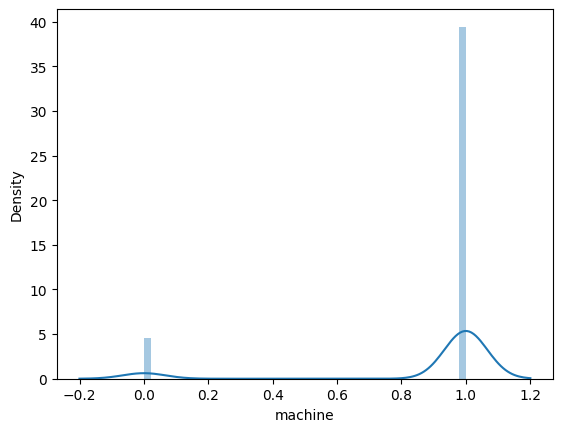

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


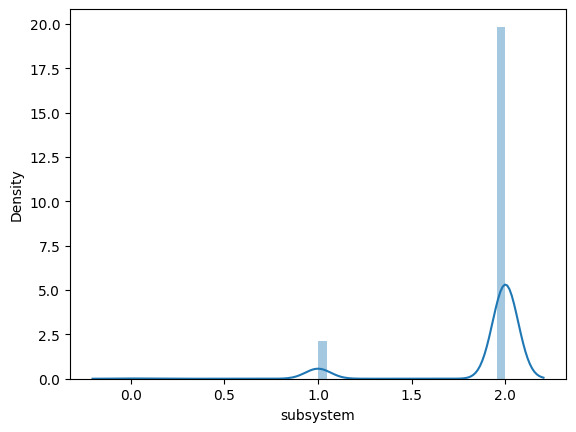

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


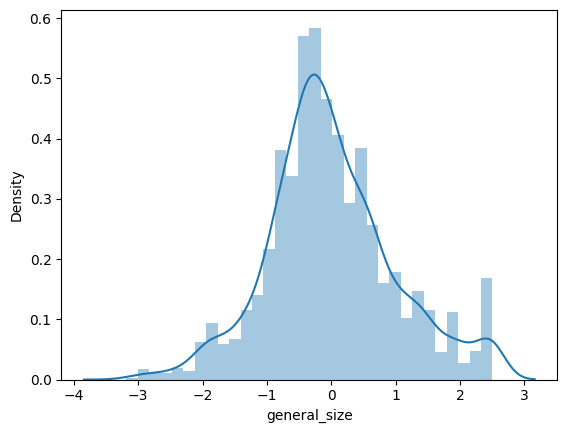

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


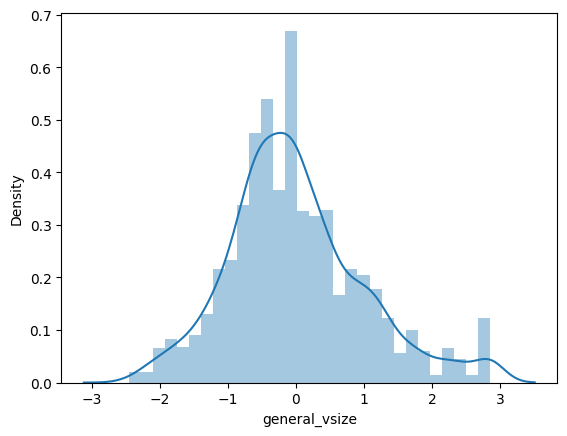

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


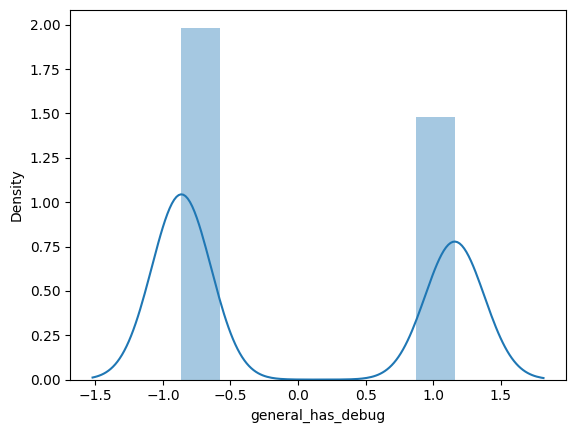

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


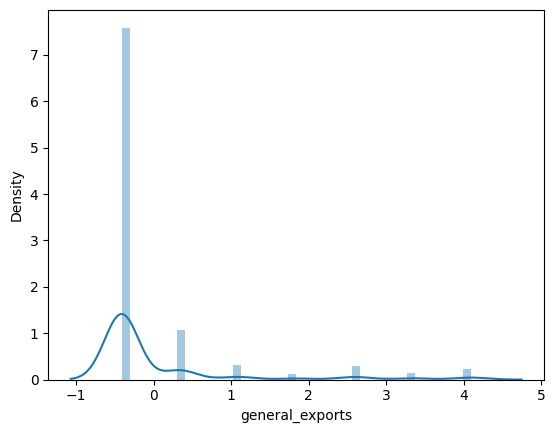

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


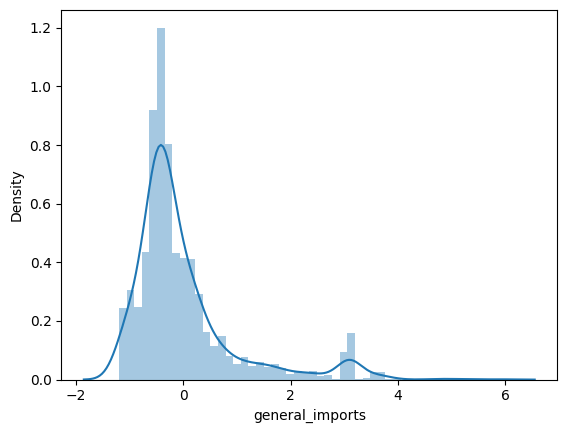

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


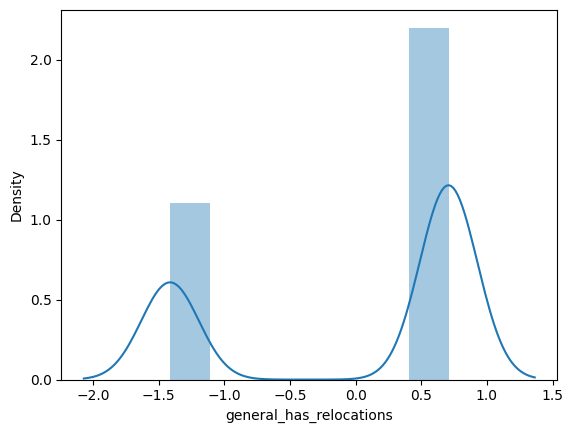

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


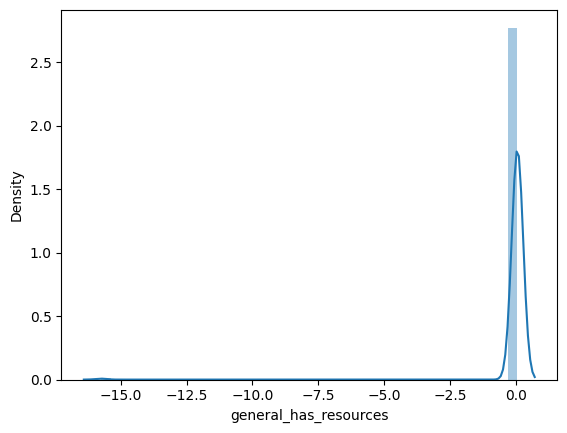

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


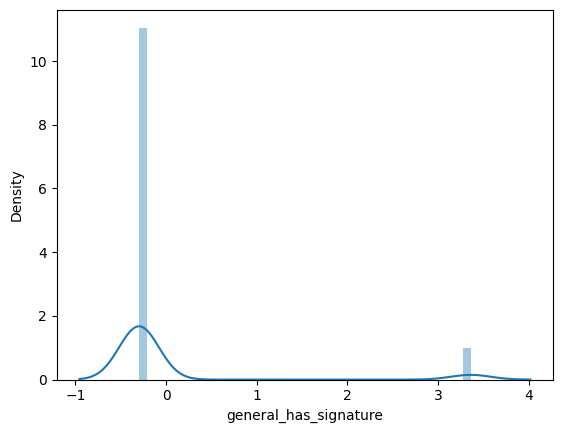

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


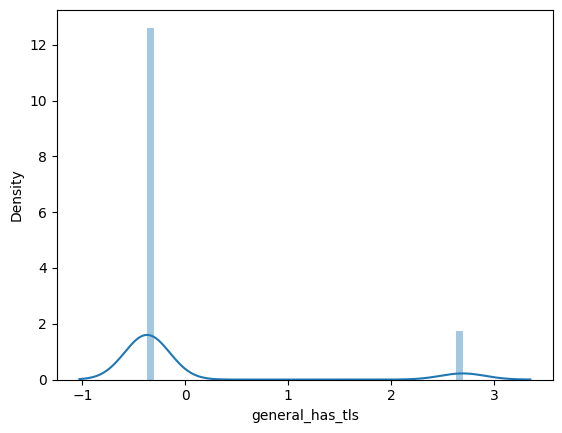

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/home/devnath/anaconda3/envs/ember_tf/lib/python3.10/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


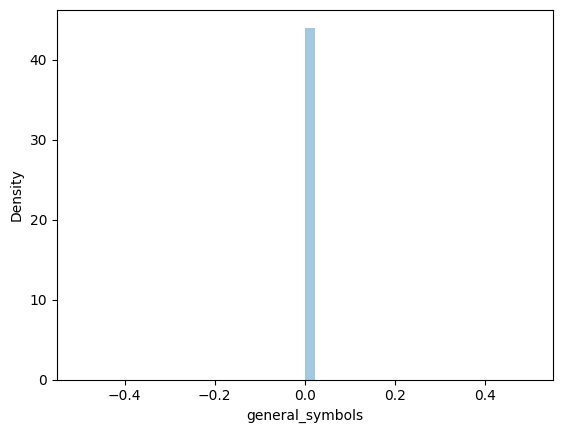

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


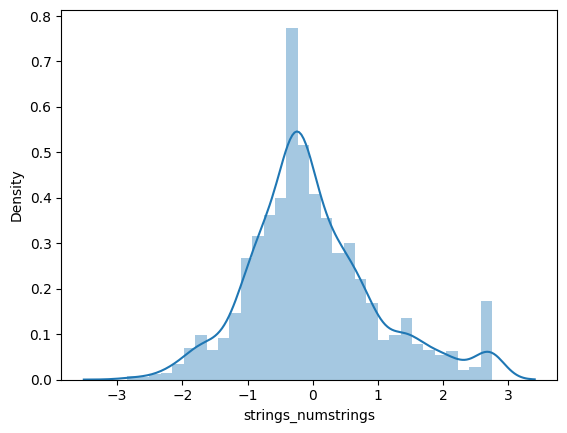

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


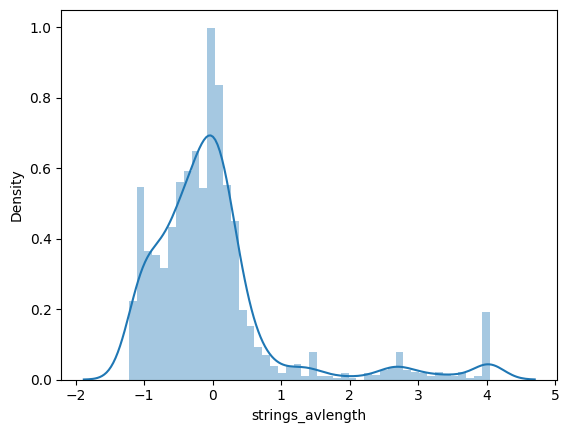

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


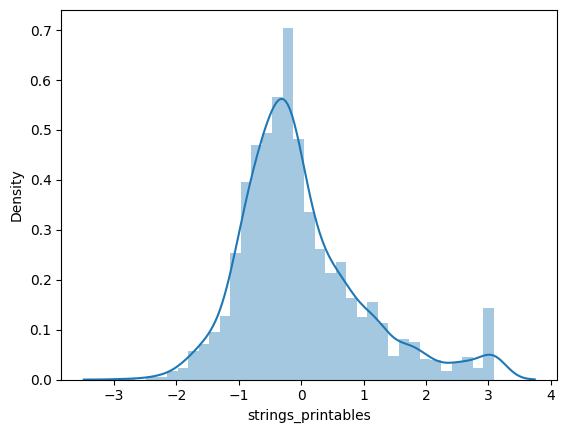

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


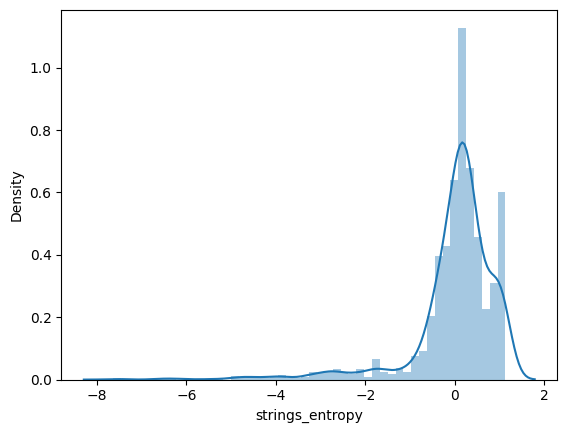

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


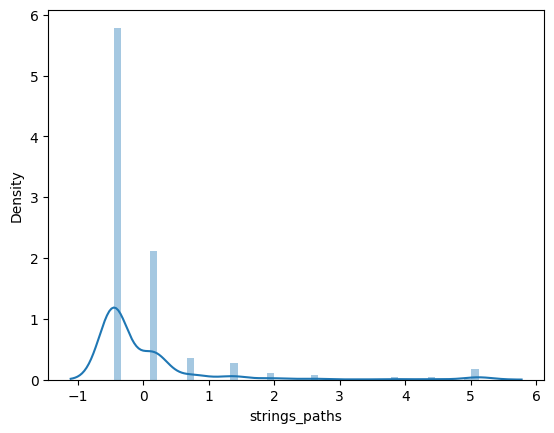

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


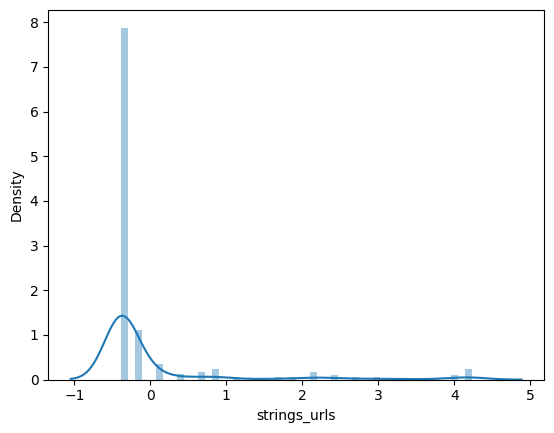

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


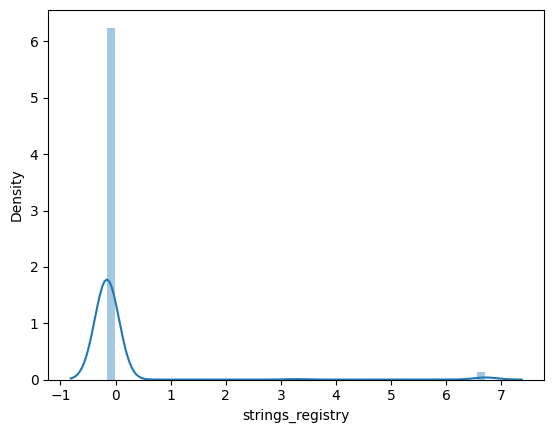

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


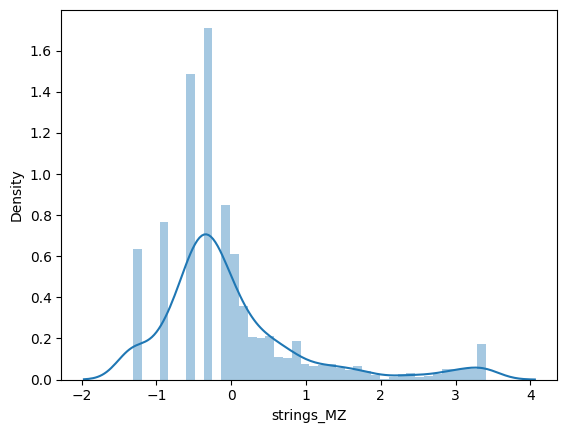

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


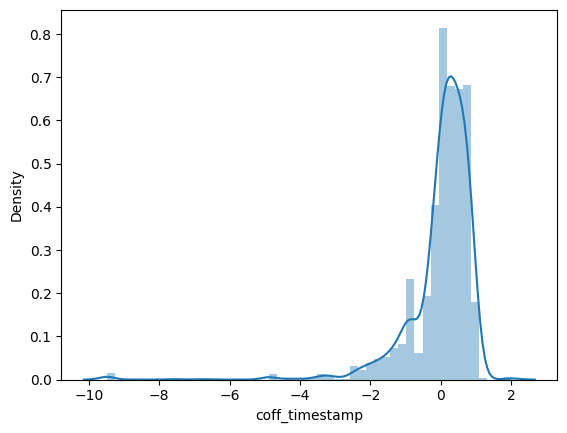

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


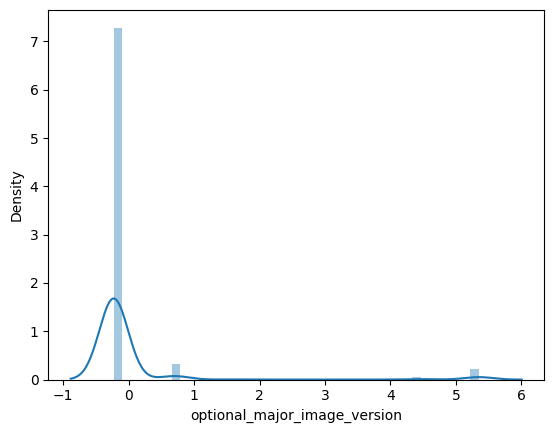

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


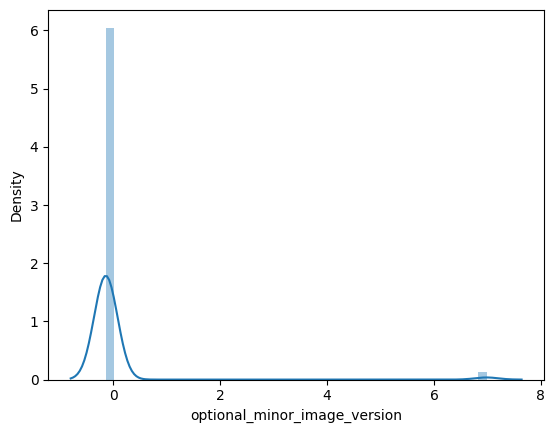

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


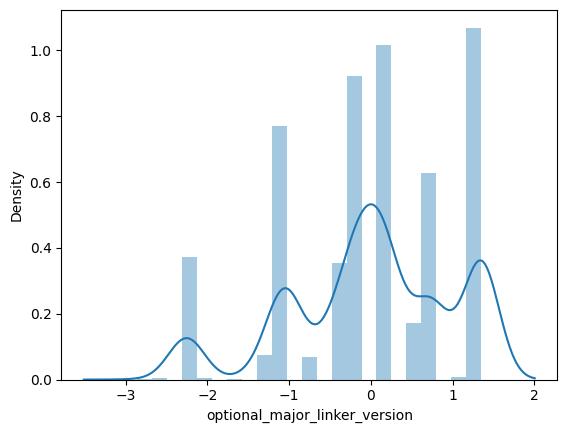

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


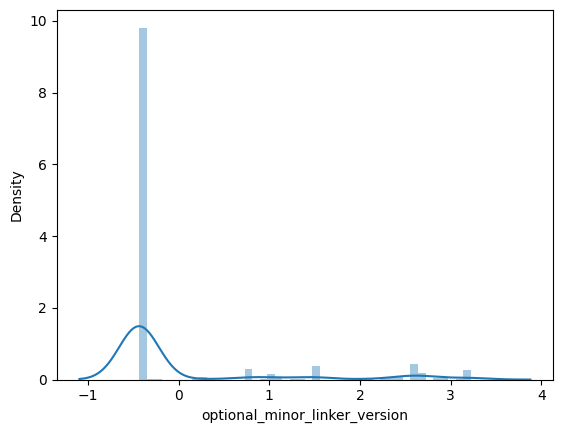

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


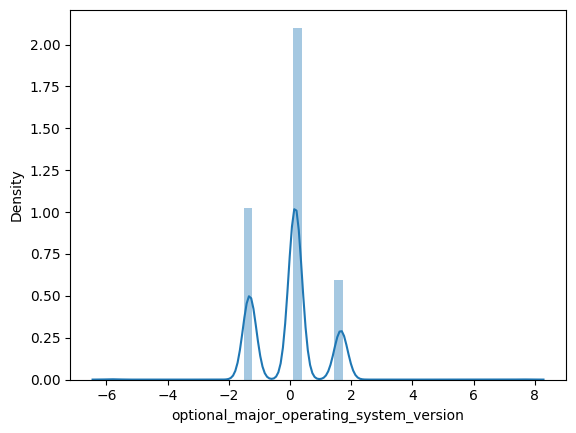

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


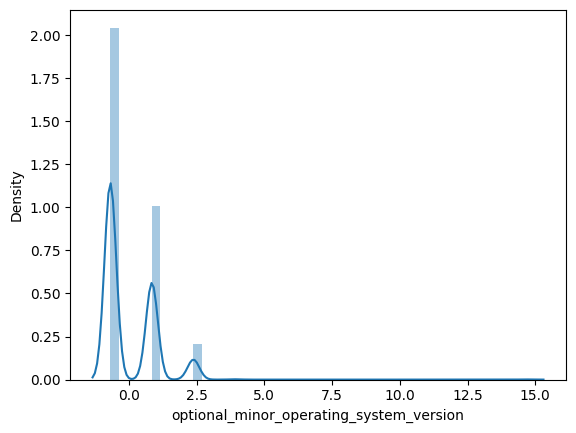

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


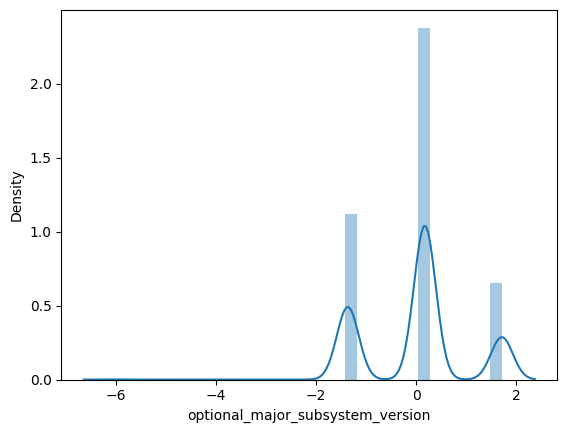

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


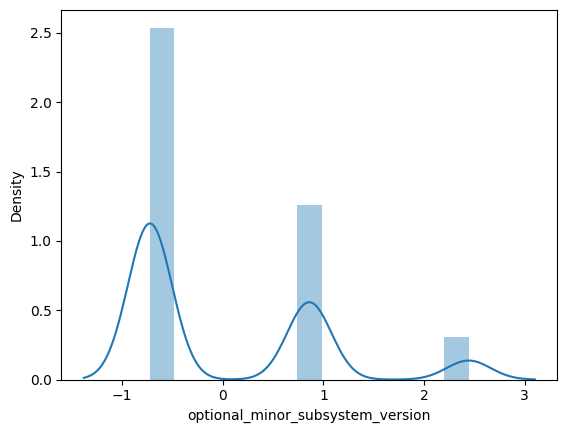

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


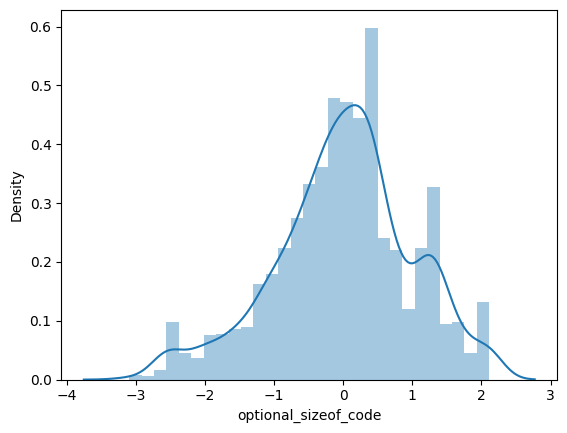

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


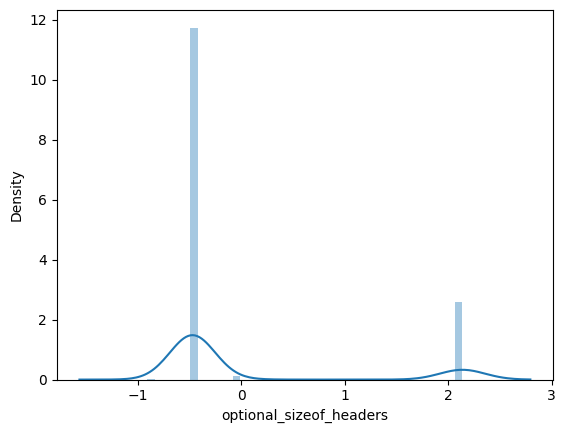

/tmp/ipykernel_61236/603956038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


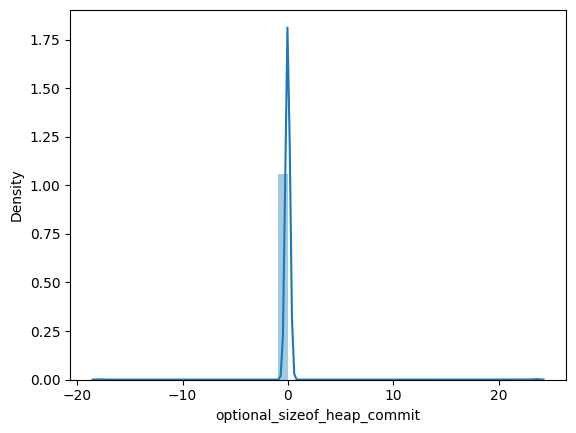

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot normal distribution of features
def plot_normal_distribution(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()
        
plot_normal_distribution(flattened_df_standardized)

In [55]:
flattened_df_standardized.to_csv('/home/devnath/MOTIF_18_Aug/dataset/motif_standardized_dataset.csv',index= False)

In [56]:
flattened_df_standardized.head()

,family,.text_size,.text_entropy,.text_vsize,.data_size,.data_entropy,.data_vsize,.rsrc_size,.rsrc_entropy,.rsrc_vsize,...,optional_minor_image_version,optional_major_linker_version,optional_minor_linker_version,optional_major_operating_system_version,optional_minor_operating_system_version,optional_major_subsystem_version,optional_minor_subsystem_version,optional_sizeof_code,optional_sizeof_headers,optional_sizeof_heap_commit
0,7,0.216416,0.254647,0.154789,0.892658,-1.219921,0.204888,1.968329,1.657989,1.880121,...,-0.143186,0.147361,-0.436876,0.172257,0.852198,0.175413,0.859723,0.147196,-0.470749,-0.026623
1,3,0.041321,-0.663225,-0.110068,0.041824,-0.102690,-0.682644,-1.217288,-0.834884,-1.062575,...,6.983910,-0.453245,-0.436876,0.172257,2.384923,0.175413,2.443171,-0.089792,-0.470749,23.593105
2,9,0.347076,0.303640,0.348503,-0.351493,-0.264988,-0.803480,-0.785909,-0.564099,-0.669807,...,-0.143186,1.348574,0.774910,1.663401,-0.680527,1.713946,-0.723726,0.352128,-0.470749,-0.026623
3,7,0.179978,0.096378,0.097292,0.714278,-1.145535,0.173998,1.582109,1.647790,1.523304,...,-0.143186,0.147361,-0.436876,0.172257,2.384923,0.175413,2.443171,0.110614,-0.470749,-0.026623
4,9,0.629287,0.403331,0.763315,0.181366,0.005512,-0.147144,1.584637,1.479741,1.525160,...,-0.143186,-0.453245,-0.436876,-1.318888,-0.680527,-1.363120,-0.723726,0.760019,2.137583,-0.026623


In [58]:
len(flattened_df_standardized)

1991